In [1]:
from scipy import stats
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

# Testování hypotéz -- 13.1

Vyrobili jsme čislo, které kontroluje naši ledničku. Teplota, kterou čidlo vrátí, je normálně rozdělená okolo skutečné teploty 
v ledničce, se směrodatnou odchylkou 1 (stupeň Celsia). Chceme ověřit, že lednička má správných $5^\circ$ C. 

## a) Máme $X \sim N(\mu, 1)$, chceme otestovat $H_0: \mu = 5$ na hladině významnosti $\alpha = 0.05$. 
Konkrétně: dostaneme měření $x=6$, co řekneme?

In [7]:
stats.norm.ppf(1-0.05/2)

1.959963984540054

In [45]:
x = 6

In [47]:
z = (x-5)/1; z

1.0

In [94]:
abs(z) > 1.96

False

$\to$ Nezamítáme $H_0$. 

## b) Provedeme $n$ měření, testujeme stejnou hypotézu. 
Konkrétně: $x = (x_1, \dots, x_5) = 6.5,6,5,4.8,5.5$. 

In [287]:
x = np.array([6.5,6,5,4.8,5.5])
sigma = (1/len(x)**.5)
z = (x.mean() - 5)/sigma
z

1.2521980673998834

Při platnosti $H_0$ je $z$ vybrané z $N(0,1)$. Protože ani tentokrát není ``abs(x) > 1.96``, tak hypotézu 
na hladině $0.05$ nezamítáme. (Nemáme ji ale dokázanou! Při získání více dat ji možná zamítneme.)

c) Zkusíme napřed ověřit samplováním. Vyrobíme si dva generátory, jeden bude vyrábět $N(5,1)$, druhý $N(4,1)$. 

In [100]:
X = stats.norm(5,1)
Y = stats.norm(4,1)

In [102]:
X.rvs(), Y.rvs()

(4.473358617639271, 3.847848293043545)

In [103]:
X.rvs(size=10).mean()

5.503796765385658

In [104]:
Y.rvs(size=10).mean()

4.3751916133372175

Takhle se pozná, zda zamítneme $H_0$ pro $X$.

In [119]:
abs(X.rvs(size=10).mean() - 5) > 1.96/10**.5

False

A takhle změříme v kolika procentech případů se tak stane. Chceme, aby to bylo zhruba 5 \%. 

In [122]:
sum([abs(X.rvs(size=10).mean() - 5) > 1.96/10**.5 for _ in range(1_000)])/1_000

0.063

A takhle změříme v kolika procentech případů se tak stane pro $Y$. 
Chceme, aby to bylo co nejvíce -- $H_0$ neplatí, takže měříme sílu testu.

In [134]:
sum([abs(Y.rvs(size=10).mean() - 5) > 1.96/10**.5 for _ in range(1_000)])/1_000

0.886

A ještě zkusíme zvýšit počet pokusů na 20:

In [124]:
n = 20
sum([bool(abs(Y.rvs(size=n).mean() - 5) > 1.96/n**.5)  for _ in range(1_000)])/1000 

0.997

Jak sílu testu určit přesně? Zamítáme při $\bar Y_{10} < 5 - 1.96/\sqrt{10}$. Pravděpodobnost, s jakou to nastane, určíme
pomocí distr.funkce pro příslušnou normální veličinu. 

In [128]:
Ymean = stats.norm(4,1/sqrt(10))

In [129]:
Ymean.cdf(5 - 1.96/sqrt(10))

0.8853720153580762

Zamítáme také, pokud $\bar Y_{10} > 5 + 1.96/\sqrt{10}$. Praděpodobnost toho zjistíme také snadno, ale je zanedbatelně malá.

In [135]:
Ymean.sf(5 + 1.96/sqrt(10))

1.5093347004406234e-07

Můžeme i převést na stand.norm.veličinu s distr. funkcí $\Phi$.

In [141]:
Phi = stats.norm.cdf
Phi( ((5-1.96/sqrt(10)) - 4)/(1/sqrt(10))), 1-Phi( ((5+1.96/sqrt(10)) - 4)/(1/sqrt(10)))

(0.8853720153580762, 1.5093347005556979e-07)

To je užitečné, pokud chceme nakreslit graf síly testu pro všechny možné hodnoty skutečného průměru:

In [143]:
mu = np.arange(0, 10, .1)

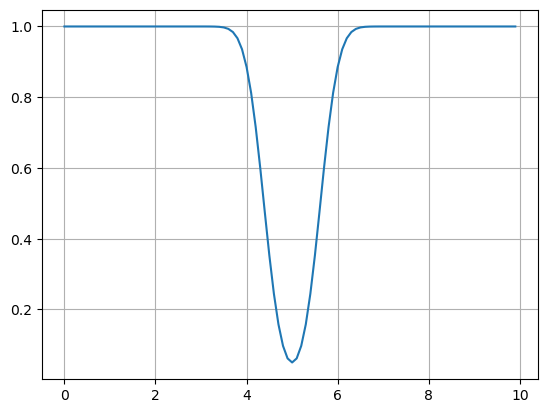

In [145]:
plt.plot(mu, Phi( ((5-1.96/sqrt(10)) - mu)/(1/sqrt(10))) + 1-Phi( ((5+1.96/sqrt(10)) - mu)/(1/sqrt(10))) )
plt.grid(True)

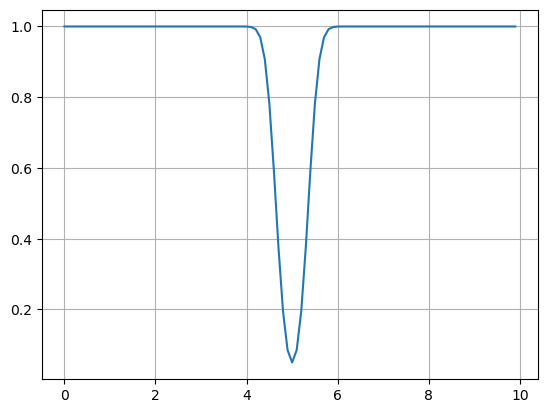

In [146]:
n = 30
plt.plot(mu, Phi( ((5-1.96/sqrt(30)) - mu)/(1/sqrt(30))) + 1-Phi( ((5+1.96/sqrt(30)) - mu)/(1/sqrt(30))) )
plt.grid(True)

## d) Pokud rozdělení $X$ není normální, 

můžeme stále použít stejný test; pokud máme dost měření, tak nás snad zachrání centrální limitní věta. Ale v praxi si asi nebudeme jistí ani rozptylem, proto přejděme k další části. 

## e) O rozptylu nic nevíme (ale věříme, že veličina je normální). Máme opět naměřená data jako v části b).

In [237]:
x = np.array([6.5,6,5,4.8,5.5])
x.mean()

5.5600000000000005

Knihovní funkce ``.var()`` a ``.std()`` jako defaultní nastavení "dělí sumu $n$, ne $n-1". Jde to ale opravit pomocí parametru ``ddof=1``.

In [244]:
x.std()   ## tohle je špatně

0.6280127387243033

In [245]:
x.std(ddof=1)  ## tohle je lepší

0.7021395872616784

Pro určení $\sigma$ průměru ještě musíme vydělit $\sqrt{n}$:

In [246]:
x.std(ddof=1)/(len(x)**.5)

0.31400636936215165

nebo použít předpřipravenou funkci.

In [235]:
stats.sem(x)

0.31400636936215165

In [250]:
se = stats.sem(x)
t = (x.mean() - 5)/se
t

1.783403314835751

Takhle spočtená veličina $t$ má Studentovo rozdělení s $n-1$ stupni volnosti. Musíme tedy přepočítat kritickou oblast:

In [253]:
stats.t(4).ppf(1-0.05/2)

2.7764451051977987

A takhle spočteme p-hodnotu:

In [262]:
stats.t(4).sf(abs(t))*2

0.1490918452896775

Zamítáme tedy je pokud ``abs(t - 5) > 2.78``.

## Stručnější způsob, jak to celé udělat, který použijeme v praxi (všimněte si, že dává stejná čísla):

In [261]:
stats.ttest_1samp(x, popmean=5)

TtestResult(statistic=1.783403314835751, pvalue=0.1490918452896775, df=4)

## Zkusíme opět změřit, jestli test dělá co má: 

In [266]:
X = stats.norm(5,1)
Y = stats.norm(4,1)

Opět změříme v kolika procentech případů zamítáme. Chceme, aby to bylo zhruba 5 \%. 

In [270]:
n = 10
sum([stats.ttest_1samp(X.rvs(size=n), popmean=5).pvalue < 0.05  for _ in range(1_000)])/1_000

0.052

A takhle změříme v kolika procentech případů se tak stane pro $Y$. 
Chceme, aby to bylo co nejvíce -- $H_0$ neplatí, takže měříme sílu testu.

In [271]:
n = 10
sum([stats.ttest_1samp(Y.rvs(size=n), popmean=5).pvalue < 0.05  for _ in range(1_000)])/1_000

0.779

## A konečně, co se stane pro jiné než normální veličiny? 

In [274]:
X = stats.expon(scale=5)   # scale = 1/lambda, tj. EX = 5
Y = stats.expon(scale=4)   # EY = 4

In [277]:
X.rvs(1000).mean(), Y.rvs(1000).mean()

(4.903659189021337, 4.158307795473019)

Nasamplujeme pravd. chyby prvního druhu. Je vidět, že s rostoucím $n$ se blíží správným 5 \%, ale pro malá $n$ je chyba větší. Pokud něco víme o rozdělení $X$, můžeme odvodit speciální test. Nebo použít nějaký neparametrický test (ale o tom až jindy).

In [284]:
sum([stats.ttest_1samp(X.rvs(size=10), popmean=5).pvalue < 0.05  for _ in range(1_000)])/1_000

0.114

In [282]:
sum([stats.ttest_1samp(X.rvs(size=30), popmean=5).pvalue < 0.05  for _ in range(1_000)])/1_000

0.072

In [285]:
sum([stats.ttest_1samp(X.rvs(size=100), popmean=5).pvalue < 0.05  for _ in range(1_000)])/1_000

0.057

A ještě sílu testu:

In [286]:
for n in [10,30,50]:
    print(n, sum([stats.ttest_1samp(Y.rvs(size=n), popmean=5).pvalue < 0.05  for _ in range(1_000)])/1_000)

10 0.222
30 0.361
50 0.475


## 13.4 Účast na zkouškách

In [318]:
stats.chisquare([42,59,42,33,21])

Power_divergenceResult(statistic=19.725888324873097, pvalue=0.000565620735402362)

In [319]:
stats.chisquare([25,40,41,27])

Power_divergenceResult(statistic=6.398496240601504, pvalue=0.09375267375945061)

In [334]:
O1 = [42,59,42,33,21]
E1 = sum(O1)/len(O1)
sum([(o-E1)**2/E1 for o in O1])

19.725888324873097

In [325]:
stats.chi2(4).sf(19.725)

0.0005658488813970437

In [329]:
O2 = [25,40,41,27]
E2 = sum(O2)/len(O2)
sum([(o-E2)**2/E2 for o in O2])

6.398496240601504

In [331]:
stats.chi2(3).sf(6.398)

0.09377310388209541

In [336]:
stats.chi2(3).ppf(0.95)

7.814727903251179

In [337]:
stats.chi2(4).ppf(0.95)

9.487729036781154